In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

#### Linear Regression with One Variable

In [3]:
df = pd.read_csv('../input/andrew_ng/ex1data1.txt', header=None, names=['population', 'profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


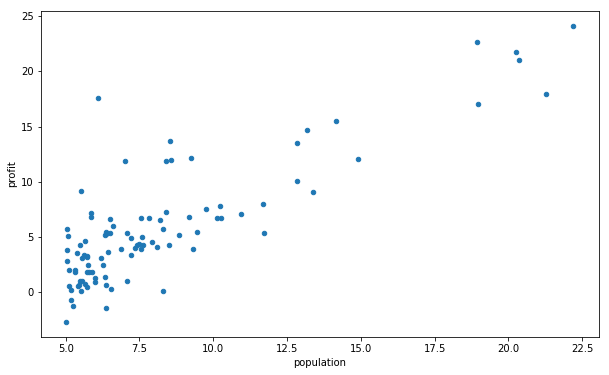

In [4]:
df.plot('population', 'profit', kind='scatter', figsize=(10,6));

In [5]:
# insert the column of 1
df.insert(0, 'ones', 1)
df.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

# initialize theta
theta = np.zeros((2,1))

X.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [7]:
def calculate_cost(X, y, theta):
    m, n = X.shape
    hx = np.dot(X, theta)
    
    return np.sum(np.power((hx-y), 2)) / (2 * m)

In [8]:
X, y, theta = np.array(X), np.array(y), np.array(theta)

"Total cost is : {}".format(calculate_cost(X, y, theta))

'Total cost is : 32.072733877455676'

In [9]:
def calculate_gradient_descent(X, y, theta, iterations, alpha):
    m, n = X.shape
    cost_list = np.zeros(iterations)
    for i in range(iterations):
        hx = np.dot(X, theta)
        theta -= np.dot(X.T, hx-y) * (alpha / m)
        cost_list[i] = calculate_cost(X, y, theta)
    return cost_list, theta

In [10]:
theta, iterations, alpha = np.zeros((2,1)), 1500, 0.01
cost_list, theta = calculate_gradient_descent(X, y, theta, iterations, alpha)

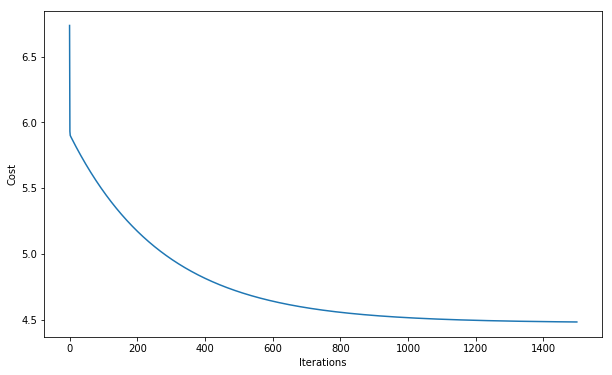

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost");

In [12]:
theta, calculate_cost(X, y, theta)

(array([[-3.63029144],
        [ 1.16636235]]), 4.483388256587726)

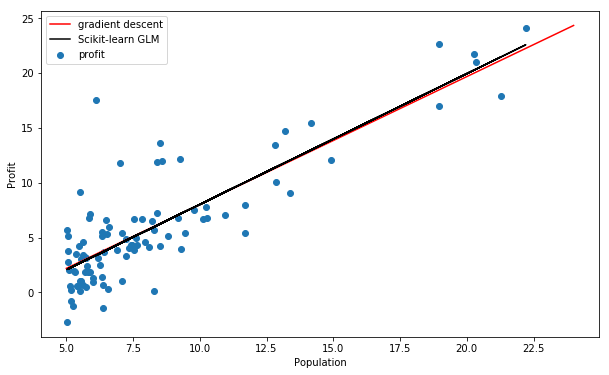

In [13]:
x_new = np.arange(5,25)
y_new = theta[0] + theta[1]*x_new


plt.figure(figsize=(10, 6))
plt.scatter(df.population, df.profit)
plt.plot(x_new, y_new, 'r', label='gradient descent')


# Using Sklearn

regr = LinearRegression()

regr.fit(X[:,1].reshape(-1, 1), y)
y_pred = regr.predict(X[:,1].reshape(-1, 1)).flatten()

plt.plot(X[:,1], y_pred, 'k', label='Scikit-learn GLM')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend();

In [14]:
r2_score(df.iloc[:,-1:], y_pred)

0.7020315537841397

In [15]:
# Profit : 35000 and 70000
theta.T.dot([1, 3.5])*10000, theta.T.dot([1, 7])*10000

(array([4519.7678677]), array([45342.45012945]))

#### Linear regression with multiple variables

In [16]:
df = pd.read_csv('../input/andrew_ng/ex1data2.txt', header=None, names=['area', 'bedrooms', 'price'])
df.head()

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


#### Normalize the data

In [17]:
df = (df - df.mean()) / df.std()
df.head()

,area,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [18]:
df.insert(0, 'ones', 1)

X = np.array(df.iloc[:, :-1])
y = np.array(df.iloc[:, -1:])

theta = np.array(np.zeros((3,1)))

In [19]:
cost_list, theta = calculate_gradient_descent(X, y, theta, 1500, 0.01)

calculate_cost(X, y, theta)

0.13068670606095903

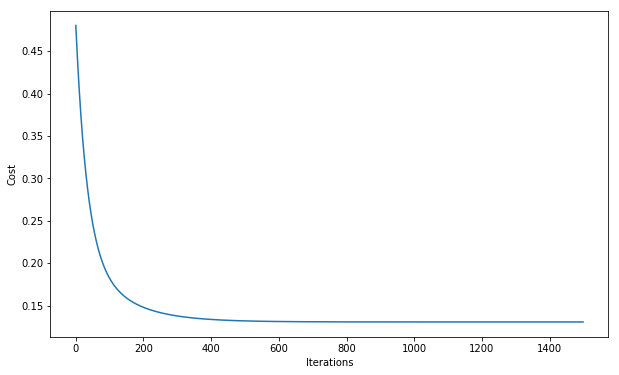

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost");

In [21]:
regr = LinearRegression()
regr.fit(df.iloc[:,:-1], df.iloc[:,-1:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_pred = regr.predict(df.iloc[:,:-1])

In [23]:
r2_score(df.iloc[:,-1:], y_pred)  # r2 score

0.7329450180289143

In [24]:
# Normal Equation

theta_norm = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

y_pred = X.dot(theta_norm)

r2_score(df.iloc[:,-1], y_pred)

0.7329450180289143